# Example of the method of locally updated planes

To run the code below:

1. Click on the cell to select it.
2. Press `SHIFT+ENTER` on your keyboard or press the play button (<button class='fa fa-play icon-play btn btn-xs btn-default'></button>) in the toolbar above.

For an overview of the notebook interface click on Help > User Interface Tour in the menu on the top.

## In this example, we find a reaction path on the Müller potential using the method of locally updated planes

See also:

- Ulitsky, A., & Elber, R. (1990). A new technique to calculate steepest descent paths in flexible polyatomic systems. The Journal of Chemical Physics, 92(2), 1510. [doi:10.1063/1.458112](http://dx.doi.org/10.1063/1.458112)

- Müller, K. (1980). Reaction paths on multidimensional energy hypersurfaces. Angewandte Chemie International Edition in English, 19(1), 1–13. [doi:10.1002/anie.198000013](http://dx.doi.org/10.1002/anie.198000013)

In [1]:
%matplotlib inline
from potential import Potential
from path import Path

import numpy as np
import matplotlib.pyplot as plt

### First, we set up the potential energy function

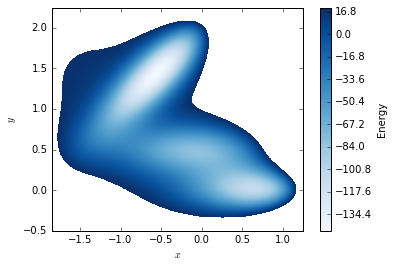

In [2]:
potential = Potential()
potential.plot()

### Next, we initialize the reaction path by declaring the location of the reactant and the product as well as the number of nodes in the path.

The variable `threshold` determines the convergence criterion for the method.  The smaller its value, the longer the method will take to converge.

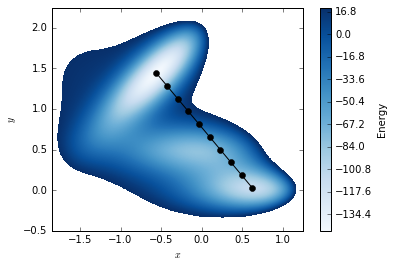

In [3]:
reactant = np.array([0.623499, 0.028038])
product = np.array([-0.558233, 1.441716])
num_nodes = 10
threshold = 1e-4
path = Path(reactant, product, num_nodes, potential, threshold)
path.plot()

### Finally, we iteratively refine the initial path until convergence is attained.

Current energy: -569.692


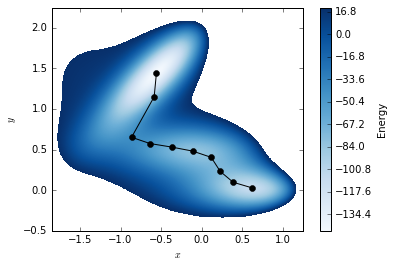

Current energy: -626.678


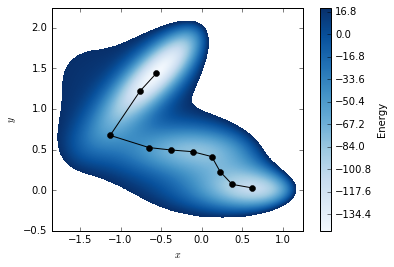

Current energy: -627.712


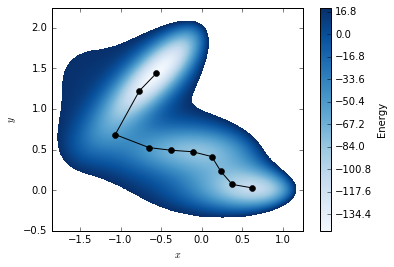

Current energy: -627.721


In [4]:
for p in iter(path):
    path.plot()
    plt.show()

## Another example joining two of the metastable states.

We add some random perturbation to the initial linear interpolation between the endpoints.

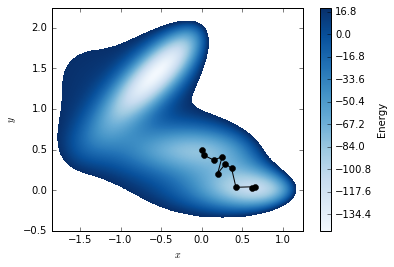

Current energy: -680.023


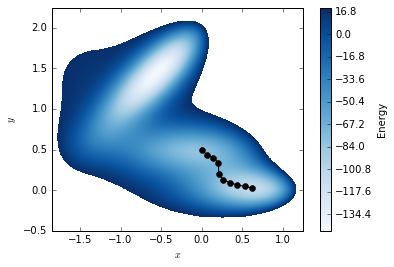

Current energy: -682.783


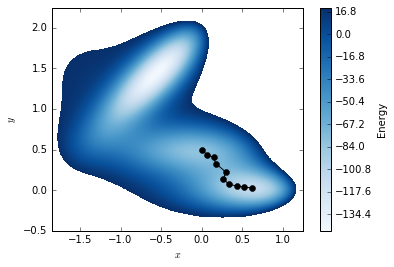

Current energy: -686.903


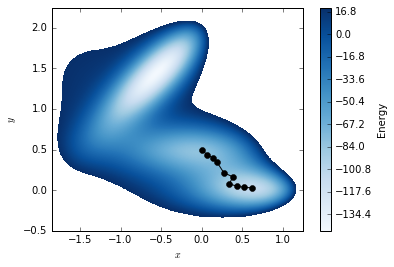

Current energy: -691.551


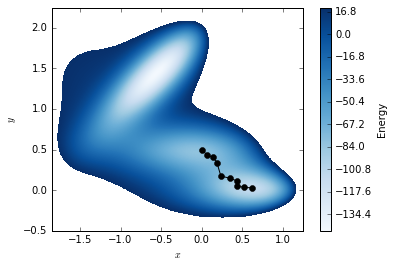

Current energy: -696.878


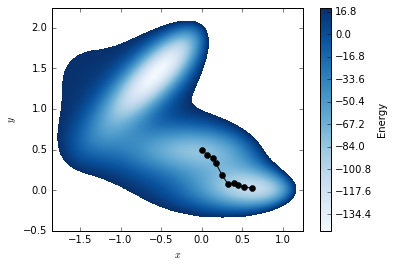

Current energy: -699.338


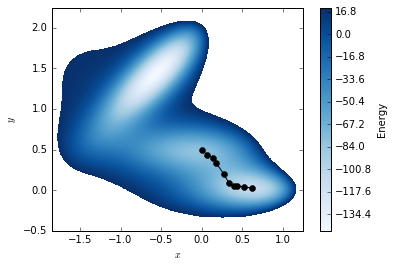

Current energy: -700.14


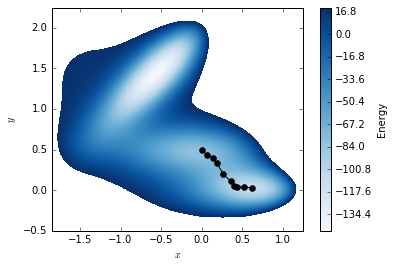

Current energy: -700.568


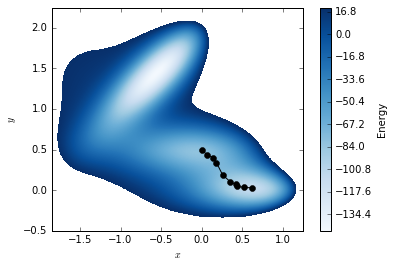

Current energy: -700.781


In [5]:
reactant = np.array([0.623499, 0.028038])
product = np.array([0.0, 0.5])
num_nodes = 10
threshold = 5e-4
path = Path(reactant, product, num_nodes, potential, threshold)
# Add random noise to the initial, linear interpolant.
perturbation = 1e-1 * (2.0 * np.random.rand(num_nodes - 2, 2) - 1.0)
path.points[1:-1, :] += perturbation
path.plot()
plt.show()
for p in iter(path):
    path.plot()
    plt.show()